# New York City Airbnb Open Data | Airbnb listings and metrics in NYC, NY, USA (2019)
## Airbnb : Wrangling, Analysis, Visualization, Regression, Classification, Hypothesis-Testing


**About Dataset**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

**Content**

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

**Acknowledgements**

This public dataset is part of Airbnb, and the original source can be found on this website.

**Inspiration**

- What can we learn about different hosts and areas?
- What can we learn from predictions? (ex: locations, prices, reviews, etc)
- Which hosts are the busiest and why?
- Is there any noticeable difference of traffic among different areas and what could be the reason for it?

## Importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import array
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Siddharth1698/New-York-City-Airbnb-Data-Case-Study/main/AB_NYC_2019.csv')

## Loading the dataset

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Understanding the dataset

In [5]:
df.shape

(48895, 16)

## Data Cleaning

In [6]:
# Understanding the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

*The data is almost 48.8k rows with 16 columns with 3 float types, 7 int types and 6 object types.*

---


In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

*There are around 10k null values in the last_review and review_per_month columns and a very few null values in name and host_name.*

---

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


-  From this we can see the mean price to be around 152 dollars.

-  Average availablity of an airbnb around a year is 112 days.

---

In [9]:
# Insight about unique values
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

*The data have 5 major locations in dataset and only 3 room types available.*

---

In [10]:
df.duplicated().sum()

0

*We do not have any duplicate rows in our dataset.*

---

In [11]:
df_copy = df.copy()

## Linear Regression

In [12]:
def linear(x,z):
  global X,y,predictions,residue
  X = df_reg[x].values.reshape(-1,1)
  y = df_reg[z].values.reshape(-1,1)


  #3 Feature Scaling
  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  sc_y = StandardScaler()

  X = sc_X.fit_transform(X)
  y = sc_X.fit_transform(y)

  from sklearn.linear_model import LinearRegression
  reg = LinearRegression()
  reg.fit(X, y)

  print("The linear model is: Y = {:.2} + {:.2}X".format(reg.intercept_[0], reg.coef_[0][0]))

  print("Regression Intercept : ",reg.intercept_[0])


  predictions = reg.predict(X)
  rms = mean_squared_error(y, predictions, squared=False)

  fig = px.scatter(
    df_reg, x=x, y=z, opacity=0.65,
    trendline='ols', trendline_color_override='darkblue')
  fig.show()

  # Plot the residuals after fitting a linear model
  sns.residplot(x=X, y=y, lowess=True, color="g")

  print("RMSE is: ", rms)
  x2 = sm.add_constant(X)

  est = sm.OLS(y, x2)
  #OLS is Ordinary Least Squares

  #est.TAB
  est2 = est.fit()
  print(est2.summary())

  residue = y - predictions

I defined a function here that will help us automatically do the regression and show the plot and OLS results.

Here i got intrested to know how the regresion line performs as early during wrangling i found number of reviews and reviews per month to be correlated with an coeffecient of 0.5. I have specfically taken a range of data for my regression purpose for better visualization. That is num of reviews less than 400 and reviews per month less than 15.

In [13]:
df_reg = df[['number_of_reviews','reviews_per_month']]
df_reg = df_reg[df_reg['number_of_reviews']<400]
df_reg = df_reg[df_reg['reviews_per_month']<15]
df_reg

,number_of_reviews,reviews_per_month
0,9,0.21
1,45,0.38
3,270,4.64
4,9,0.10
5,74,0.59
...,...,...
48782,1,1.00
48790,1,1.00
48799,1,1.00
48805,2,2.00


Here we are plotting thr linear model for this simple linear regression. We can analyze the model and get the regression Intercept.

Also i have plotted the residue plot at the end so that we can see how the difference between actual value and prediction is.

The linear model is: Y = 8.5e-17 + 0.55X
Regression Intercept :  8.539336911022668e-17


RMSE is:  0.83678489212127
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                 1.661e+04
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:57:19   Log-Likelihood:                -48136.
No. Observations:               38796   AIC:                         9.628e+04
Df Residuals:                   38794   BIC:                         9.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.874e-16    

,number_of_reviews,reviews_per_month,Predictions,Residue
0,9.0,0.21,-0.235551,-0.475993
1,45.0,0.38,0.191958,-0.798449
3,270.0,4.64,-0.235551,-0.543968
4,9.0,0.10,0.536340,-1.013061
5,74.0,0.59,0.239459,-0.833591


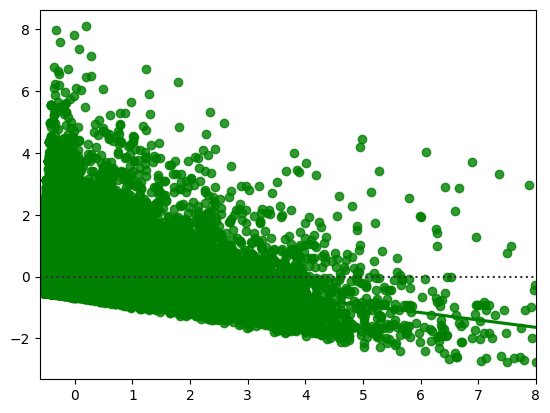

In [14]:
linear('number_of_reviews','reviews_per_month')
df_n = pd.DataFrame(predictions, columns = ['Predictions'])
df_reg_new = pd.concat([df_reg,df_n],axis = 1)
df_n = pd.DataFrame(residue, columns = ['Residue'])
df_reg_new = pd.concat([df_reg_new,df_n],axis = 1)
df_reg_new[['number_of_reviews','reviews_per_month','Predictions','Residue']].head()

We can from here interpret the fact that R2 is almost 0.35 which means the model is considered weak in nature and not particularly weak. We have also got our RMSE around 0.8 which is fine to an extent.